In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
from numpy.linalg import LinAlgError
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D, AxLine
import seaborn as sns
import re
import attila_utils
import warnings
warnings.filterwarnings('ignore')

In [2]:
treatments = {
    'A': 'Amiloride',
    'B': 'HCQ',
    'C': 'HCQ nano',
    'D': 'Saline',
    'E': 'R-HCQ',
    'F': 'S-HCQ',
    'G': 'TUDCA',
    'H': 'Saline WT',
    'I': 'TUDCA WT',
    'J': 'DMSO WT',
}

In [3]:
fpath = '../../resources/QPS/5xFAD-mouse/CO28152_NFL-GFAP_datasum.xlsx'
nfl_invivo = pd.read_excel(fpath, sheet_name='NFL in vivo clean')
nfl_invivo = nfl_invivo.melt(id_vars=['Cohort', 'Group', 'IRN', 'Sex', 'Genotype'], value_name='NF-L')
nfl_invivo['Week'] = nfl_invivo.variable.str.replace('NF-L week ', '').astype(int)
nfl_invivo

,Cohort,Group,IRN,Sex,Genotype,variable,NF-L,Week
0,I,A,15117,f,tg/wt,NF-L week 0,576.0,0
1,I,A,15119,f,tg/wt,NF-L week 0,698.0,0
2,I,A,14627 A,f,tg/wt,NF-L week 0,701.0,0
3,III,A,15161,f,tg/wt,NF-L week 0,574.0,0
4,II,A,15938,m,tg/wt,NF-L week 0,291.0,0
...,...,...,...,...,...,...,...,...
231,V,J,15195 A,f,wt/wt,NF-L week 12,42.0,12
232,VI,J,15251,f,wt/wt,NF-L week 12,35.0,12
233,V,J,16180,m,wt/wt,NF-L week 12,24.0,12
234,V,J,16192,m,wt/wt,NF-L week 12,44.0,12


['named-figure/NF-L-in-vivo.png', 'named-figure/NF-L-in-vivo.pdf']

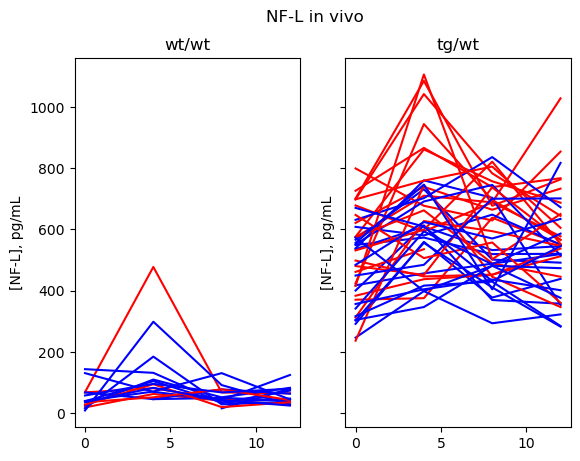

In [4]:
def line_plotter(nfl_df, x='Week', y='NF-L', marker='', sharey=True):
    fig, ax = plt.subplots(1, 2, sharey=sharey)
    for axi, genotype in zip(ax, nfl_df.Genotype.sort_values(ascending=False).unique()):
        df_genotype = nfl_df.loc[nfl_df.Genotype == genotype]
        axi.set_title(genotype)
        axi.set_ylabel('[NF-L], pg/mL')
        for irn in df_genotype.IRN.unique():
            df = df_genotype.loc[df_genotype.IRN == irn]
            sex = df.Sex.unique()[0]
            color = {'m': 'blue', 'f': 'red'}[sex]
            #marker = '$' + df.Group.unique()[0] + '$'
            axi.plot(x, y, data=df, color=color, marker=marker)
    return((fig, ax))

fig, ax = line_plotter(nfl_invivo, x='Week', y='NF-L')
fig.suptitle('NF-L in vivo')
attila_utils.savefig(fig, 'NF-L-in-vivo')

['named-figure/NF-L-in-vivo-wt-tg.png', 'named-figure/NF-L-in-vivo-wt-tg.pdf']

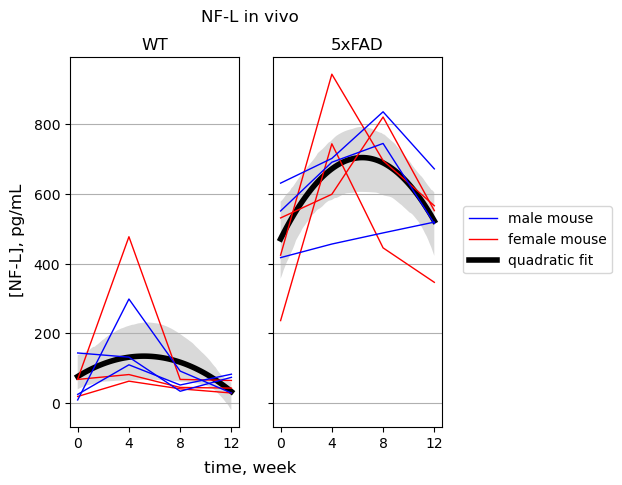

In [5]:
def line_plotter_treatments(nfl_df, group_list, x='Week', y='NF-L', marker='', treatments=treatments, sharey=True):
    fig, ax = plt.subplots(1, len(group_list), sharey=sharey, figsize=(2.4 * len(group_list), 4.8))
    linewidth = 1
    for axi, group in zip(ax, group_list):
        df_group = nfl_df.loc[nfl_df.Group == group]
        try:
            sns.regplot(data=df_group, x=x, y=y, order=2, ax=axi, marker='', line_kws={'lw': linewidth * 4, 'color': 'k'})
            fit_failed = False
        except LinAlgError:
            fit_failed = True
        axi.set_xlabel('')
        axi.set_ylabel('')
        treatment = treatments[group]
        axi.set_title(treatment)
        axi.grid(axis='y')
        axi.set_xticks([0, 4, 8, 12])
        for irn in df_group.IRN.unique():
            df = df_group.loc[df_group.IRN == irn]
            sex = df.Sex.unique()[0]
            color = {'m': 'blue', 'f': 'red'}[sex]
            #marker = '$' + df.Group.unique()[0] + '$'
            axi.plot(x, y, data=df, color=color, marker=marker, lw=linewidth)
    lines = [AxLine(xy1=(0, 0), xy2=(10, 0), slope=None, color=c, linewidth=lw) for c, lw in zip(['blue', 'red', 'k'], [linewidth, linewidth, 4 * linewidth])]
    labels = ['male mouse', 'female mouse', 'quadratic fit']
    if fit_failed:
        lines.pop()
        labels.pop()
    fig.legend(lines, labels, loc='center left', bbox_to_anchor=(0.95 - len(group_list) * 0.01, 0.5))
    return((fig, ax))

group_list = ['H', 'D']
fig, ax = line_plotter_treatments(nfl_invivo, group_list, x='Week', y='NF-L', treatments={'D': '5xFAD', 'H': 'WT'})
fig.suptitle('NF-L in vivo')
fig.supxlabel('time, week')
fig.supylabel('[NF-L], pg/mL', x=0)
attila_utils.savefig(fig, 'NF-L-in-vivo-wt-tg')

['named-figure/NF-L-in-vivo-wt-tg-sharey-off.png',
 'named-figure/NF-L-in-vivo-wt-tg-sharey-off.pdf']

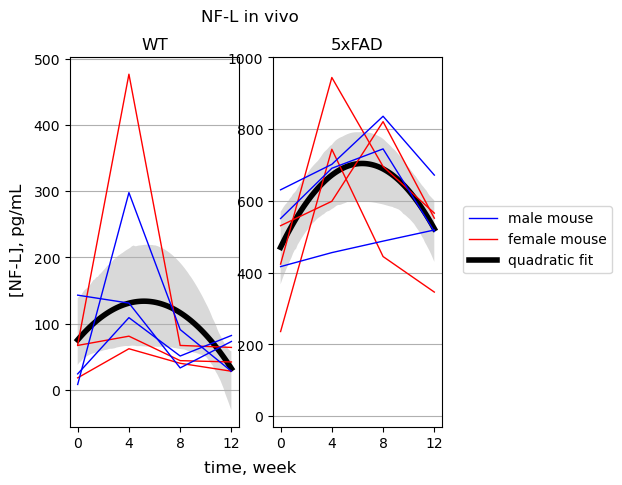

In [6]:
group_list = ['H', 'D']
fig, ax = line_plotter_treatments(nfl_invivo, group_list, x='Week', y='NF-L', treatments={'D': '5xFAD', 'H': 'WT'}, sharey=False)
fig.suptitle('NF-L in vivo')
fig.supxlabel('time, week')
fig.supylabel('[NF-L], pg/mL', x=0)
ax[1].set_ylim(-30, 1000)
attila_utils.savefig(fig, 'NF-L-in-vivo-wt-tg-sharey-off')

['named-figure/NF-L-in-vivo-treatments-tg.png',
 'named-figure/NF-L-in-vivo-treatments-tg.pdf']

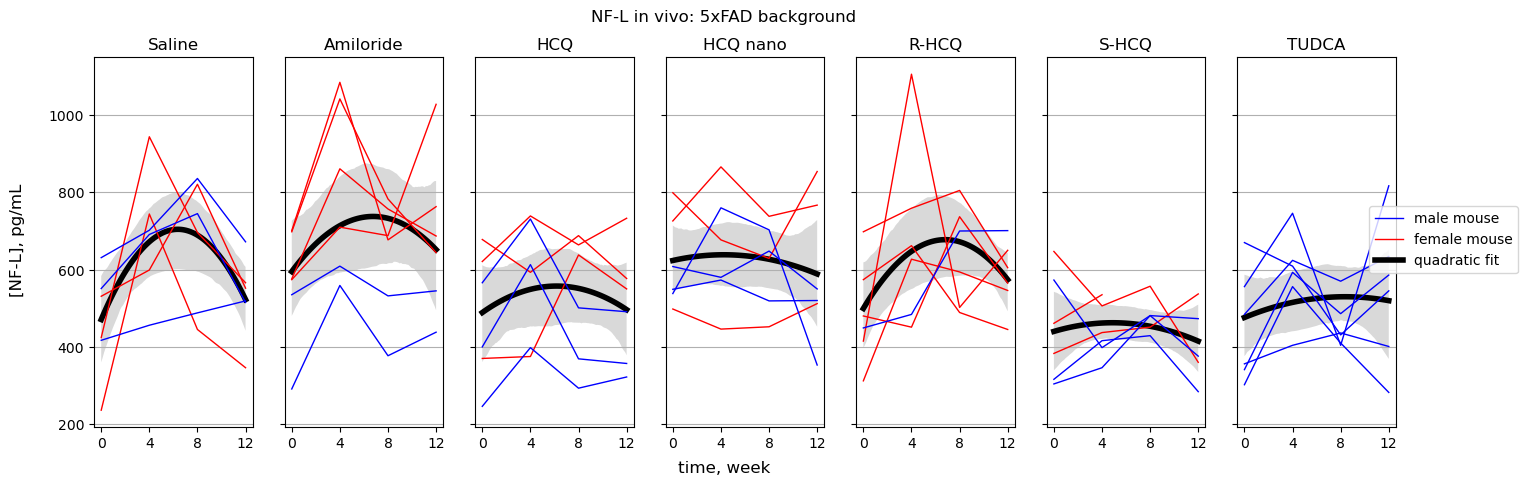

In [7]:
group_list = ['D', 'A', 'B', 'C', 'E', 'F', 'G']
fig, ax = line_plotter_treatments(nfl_invivo, group_list, x='Week', y='NF-L')
fig.suptitle('NF-L in vivo: 5xFAD background')
fig.supxlabel('time, week')
fig.supylabel('[NF-L], pg/mL', x=0.075)
attila_utils.savefig(fig, 'NF-L-in-vivo-treatments-tg')

['named-figure/NF-L-in-vivo-treatments-tg-TUDCA.png',
 'named-figure/NF-L-in-vivo-treatments-tg-TUDCA.pdf']

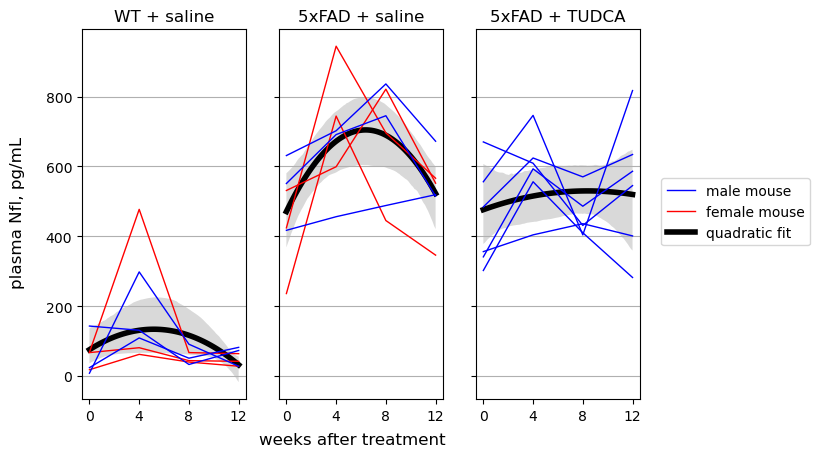

In [8]:
group_list = ['H', 'D', 'G']
fig, ax = line_plotter_treatments(nfl_invivo, group_list, x='Week', y='NF-L')
fig.supxlabel('weeks after treatment')
fig.supylabel('plasma Nfl, pg/mL', x=0.025)
for axi, title in zip(ax, ['WT + saline', '5xFAD + saline', '5xFAD + TUDCA']):
    axi.set_title(title)
attila_utils.savefig(fig, 'NF-L-in-vivo-treatments-tg-TUDCA')

['named-figure/NF-L-in-vivo-treatments-tg-TUDCA-anonym.png',
 'named-figure/NF-L-in-vivo-treatments-tg-TUDCA-anonym.pdf']

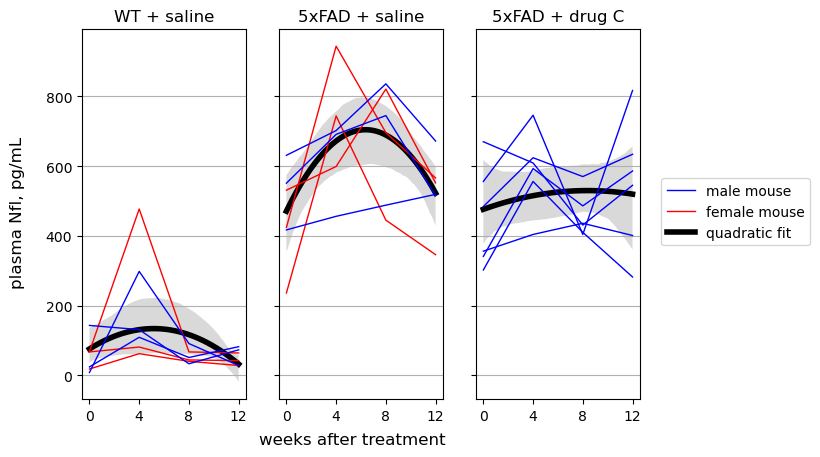

In [9]:
group_list = ['H', 'D', 'G']
fig, ax = line_plotter_treatments(nfl_invivo, group_list, x='Week', y='NF-L')
fig.supxlabel('weeks after treatment')
fig.supylabel('plasma Nfl, pg/mL', x=0.025)
for axi, title in zip(ax, ['WT + saline', '5xFAD + saline', '5xFAD + drug C']):
    axi.set_title(title)
attila_utils.savefig(fig, 'NF-L-in-vivo-treatments-tg-TUDCA-anonym')

['named-figure/NF-L-in-vivo-treatments-wt.png',
 'named-figure/NF-L-in-vivo-treatments-wt.pdf']

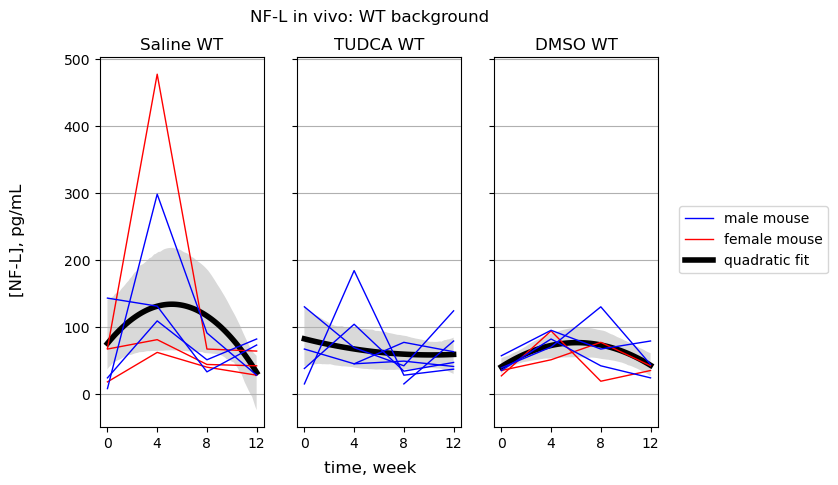

In [10]:
group_list = ['H', 'I', 'J']
fig, ax = line_plotter_treatments(nfl_invivo, group_list, x='Week', y='NF-L')
fig.suptitle('NF-L in vivo: WT background')
fig.supxlabel('time, week')
fig.supylabel('[NF-L], pg/mL', x=0)
attila_utils.savefig(fig, 'NF-L-in-vivo-treatments-wt')

In [11]:
fpath = '../../resources/QPS/5xFAD-mouse/CO28152_NFL-GFAP_datasum.xlsx'
nfl_term = pd.read_excel(fpath, sheet_name='NFL terminal clean')
s = nfl_term.iloc[:, -2:].mean()
scaler = s.loc['NF-L terminal plasma'] / s.loc['NF-L terminal CSF']
nfl_term['NF-L terminal CSF'] = nfl_term['NF-L terminal CSF'] * scaler
nfl_term_scaled = nfl_term.melt(id_vars=['Cohort', 'Group', 'IRN', 'Sex', 'Genotype'], value_name='NF-L', var_name='Location')
nfl_term_scaled['x'] = nfl_term_scaled.Location.apply(lambda x: {'NF-L terminal plasma': 0, 'NF-L terminal CSF': 1}[x])
nfl_term_scaled

,Cohort,Group,IRN,Sex,Genotype,Location,NF-L,x
0,I,A,15117,f,tg/wt,NF-L terminal plasma,1679.000000,0
1,I,A,15119,f,tg/wt,NF-L terminal plasma,828.000000,0
2,I,A,14627 A,f,tg/wt,NF-L terminal plasma,1102.000000,0
3,III,A,15161,f,tg/wt,NF-L terminal plasma,657.000000,0
4,II,A,15938,m,tg/wt,NF-L terminal plasma,482.000000,0
...,...,...,...,...,...,...,...,...
113,V,J,15195 A,f,wt/wt,NF-L terminal CSF,22.339395,1
114,VI,J,15251,f,wt/wt,NF-L terminal CSF,22.644369,1
115,V,J,16180,m,wt/wt,NF-L terminal CSF,19.594623,1
116,V,J,16192,m,wt/wt,NF-L terminal CSF,10.483504,1


In [12]:
scaler

0.038121834155207306

['named-figure/NF-L-boxplot-wt-tg.png', 'named-figure/NF-L-boxplot-wt-tg.pdf']

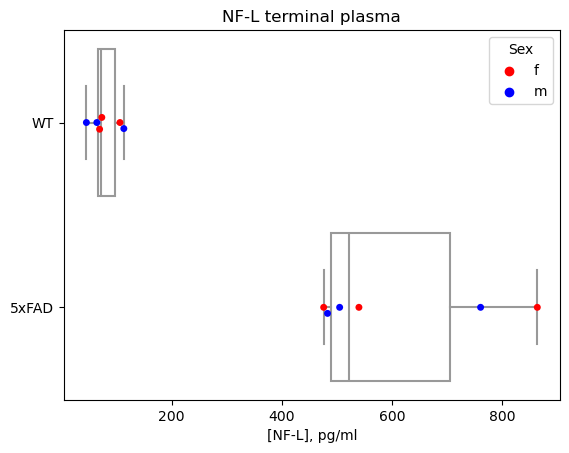

In [13]:
def my_boxplot(df, group_list=['H', 'I', 'J'], x='NF-L', treatments=treatments, biomarker='NF-L'):
    data = df.loc[df.Group.isin(group_list)]
    fig, ax = plt.subplots(figsize=(6.4, 4.8))
    sns.boxplot(data=data, y='Group', x=x,
                order=group_list, showfliers=False, color='white', ax=ax)
    sns.swarmplot(data=data, y='Group', x=x, hue='Sex',
                  order=group_list, palette={'m': 'blue', 'f': 'red'}, ax=ax)
    ax.set_xlabel('[' + biomarker + '], pg/ml')
    ax.set_ylabel('')
    ax.set_yticklabels([treatments[g] for g in group_list])
    ax.set_title(biomarker + ' terminal plasma')
    return((fig, ax))

df = nfl_term_scaled.loc[nfl_term_scaled.Location == 'NF-L terminal plasma']
fig, ax = my_boxplot(df, group_list=['H', 'D'], treatments={'D': '5xFAD', 'H': 'WT'}, biomarker='NF-L')
attila_utils.savefig(fig, 'NF-L-boxplot-wt-tg')

['named-figure/NF-L-boxplot-treatments-tg.png',
 'named-figure/NF-L-boxplot-treatments-tg.pdf']

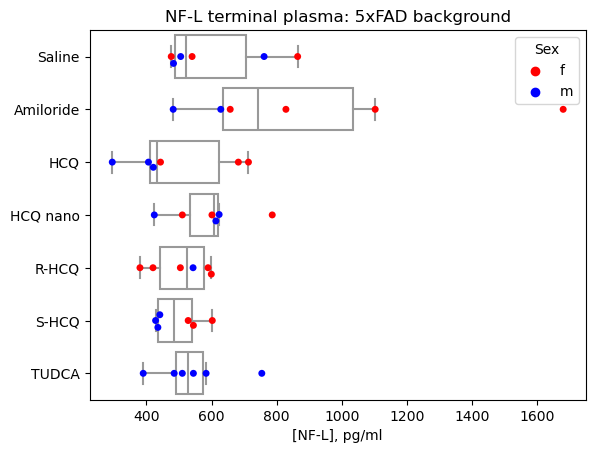

In [14]:
df = nfl_term_scaled.loc[nfl_term_scaled.Location == 'NF-L terminal plasma']
group_list = ['D', 'A', 'B', 'C', 'E', 'F', 'G']
fig, ax = my_boxplot(df, group_list=group_list, biomarker='NF-L')
ax.set_title('NF-L terminal plasma: 5xFAD background')
attila_utils.savefig(fig, 'NF-L-boxplot-treatments-tg')

['named-figure/NF-L-boxplot-treatments-wt.png',
 'named-figure/NF-L-boxplot-treatments-wt.pdf']

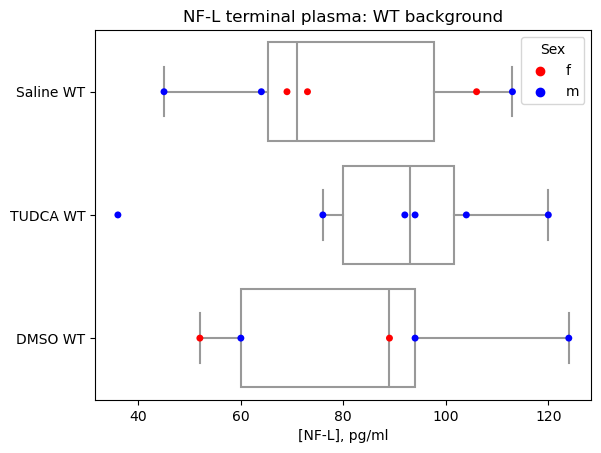

In [15]:
df = nfl_term_scaled.loc[nfl_term_scaled.Location == 'NF-L terminal plasma']
group_list = ['H', 'I', 'J']
fig, ax = my_boxplot(df, group_list=group_list, biomarker='NF-L')
ax.set_title('NF-L terminal plasma: WT background')
attila_utils.savefig(fig, 'NF-L-boxplot-treatments-wt')

['named-figure/NF-L-terminal.png', 'named-figure/NF-L-terminal.pdf']

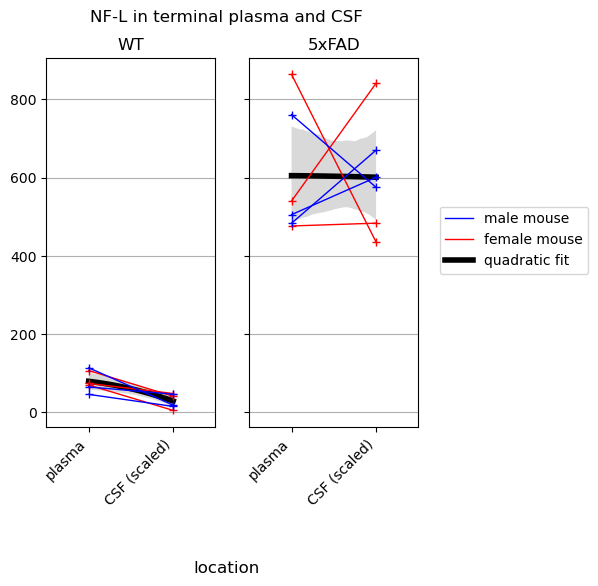

In [16]:
def format_xaxis(fig, ax):
    fig.suptitle('NF-L in terminal plasma and CSF')
    for axi in ax:
        axi.set_xlim([-0.5, 1.5])
        axi.set_xticks([0, 1])
        axi.set_xticklabels(['plasma', 'CSF (scaled)'], rotation=45, ha='right')
    return((fig, ax))

group_list = ['H', 'D']
fig, ax = line_plotter_treatments(nfl_term_scaled, group_list, x='x', y='NF-L', marker='+', treatments={'D': '5xFAD', 'H': 'WT'})
fig, ax = format_xaxis(fig, ax)
fig.supxlabel('location', y=-0.2)
attila_utils.savefig(fig, 'NF-L-terminal')

['named-figure/NF-L-terminal-tg.png', 'named-figure/NF-L-terminal-tg.pdf']

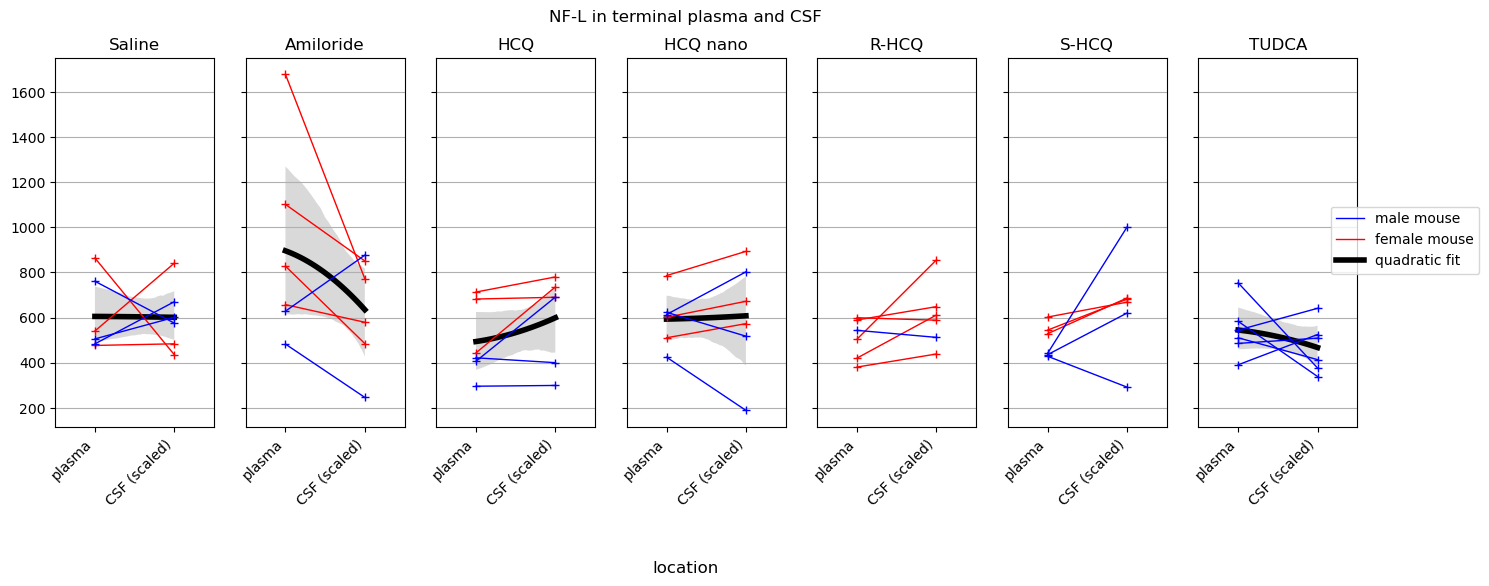

In [17]:
group_list = ['D', 'A', 'B', 'C', 'E', 'F', 'G']
fig, ax = line_plotter_treatments(nfl_term_scaled, group_list, x='x', y='NF-L', marker='+')
fig, ax = format_xaxis(fig, ax)
fig.supxlabel('location', y=-0.2)
attila_utils.savefig(fig, 'NF-L-terminal-tg')

['named-figure/NF-L-terminal-wt.png', 'named-figure/NF-L-terminal-wt.pdf']

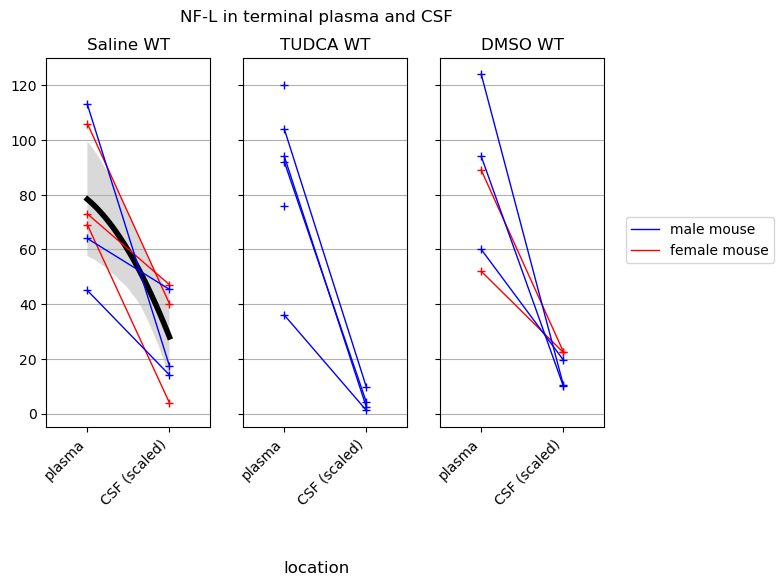

In [18]:
group_list = ['H', 'I', 'J']
fig, ax = line_plotter_treatments(nfl_term_scaled, group_list, x='x', y='NF-L', marker='+')
fig, ax = format_xaxis(fig, ax)
fig.supxlabel('location', y=-0.2)
attila_utils.savefig(fig, 'NF-L-terminal-wt')

In [19]:
nfl_term

,Cohort,Group,IRN,Sex,Genotype,NF-L terminal plasma,NF-L terminal CSF
0,I,A,15117,f,tg/wt,1679,771.547801
1,I,A,15119,f,tg/wt,828,484.071050
2,I,A,14627 A,f,tg/wt,1102,850.841217
3,III,A,15161,f,tg/wt,657,578.880052
4,II,A,15938,m,tg/wt,482,245.237759
5,IV,A,16122,m,tg/wt,628,876.725942
6,I,B,15127,f,tg/wt,682,689.776467
7,IV,B,15201,f,tg/wt,443,735.637034
8,V,B,15245,f,tg/wt,713,780.010849
9,I,B,15928,m,tg/wt,295,298.417718


['named-figure/NFL-terminal-CSF-scatter.png',
 'named-figure/NFL-terminal-CSF-scatter.pdf']

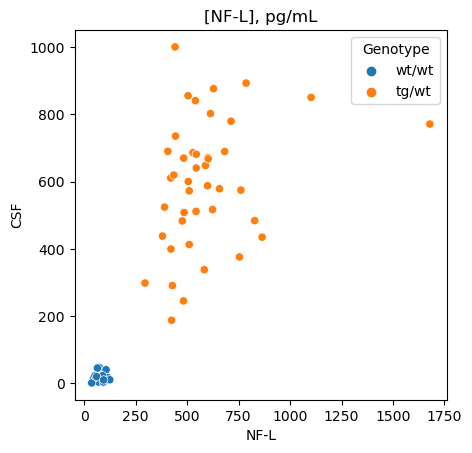

In [20]:
fig, ax = plt.subplots(figsize=(4.8, 4.8))
ax = sns.scatterplot(x='NF-L terminal plasma', y='NF-L terminal CSF', hue='Genotype', hue_order=['wt/wt', 'tg/wt'], data=nfl_term, ax=ax)
ax.set_xlabel('NF-L')
ax.set_ylabel('CSF')
ax.set_title('[NF-L], pg/mL')
attila_utils.savefig(fig, 'NFL-terminal-CSF-scatter')

In [21]:
fpath = '../../resources/QPS/5xFAD-mouse/CO28152_NFL-GFAP_datasum.xlsx'
gfap = pd.read_excel(fpath, sheet_name='GFAP plasma clean')
gfap

,Cohort,Group,IRN,Sex,Genotype,GFAP terminal plasma
0,I,A,15117,f,tg/wt,42981.0
1,I,A,15119,f,tg/wt,50086.0
2,I,A,14627 A,f,tg/wt,28913.0
3,III,A,15161,f,tg/wt,27315.0
4,II,A,15938,m,tg/wt,48708.0
5,IV,A,16122,m,tg/wt,13124.0
6,I,B,15127,f,tg/wt,34114.0
7,IV,B,15201,f,tg/wt,88214.0
8,V,B,15245,f,tg/wt,47545.0
9,I,B,15928,m,tg/wt,NaN


['named-figure/GFAP-boxplot-wt-tg.png', 'named-figure/GFAP-boxplot-wt-tg.pdf']

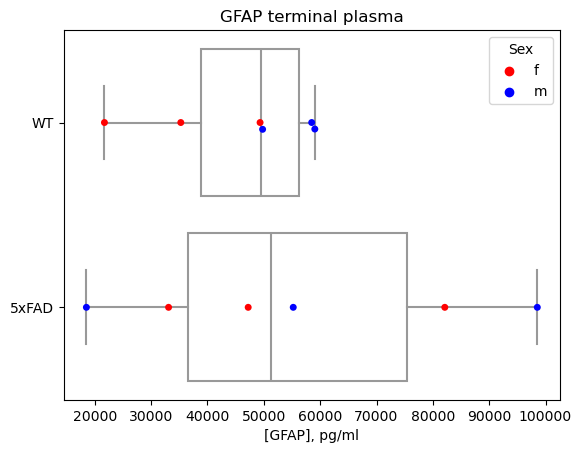

In [22]:
fig, ax = my_boxplot(gfap, group_list=['H', 'D'], x='GFAP terminal plasma', treatments={'D': '5xFAD', 'H': 'WT'}, biomarker='GFAP')
ax.set_title('GFAP terminal plasma')
attila_utils.savefig(fig, 'GFAP-boxplot-wt-tg')

['named-figure/GFAP-boxplot-treatments-tg.png',
 'named-figure/GFAP-boxplot-treatments-tg.pdf']

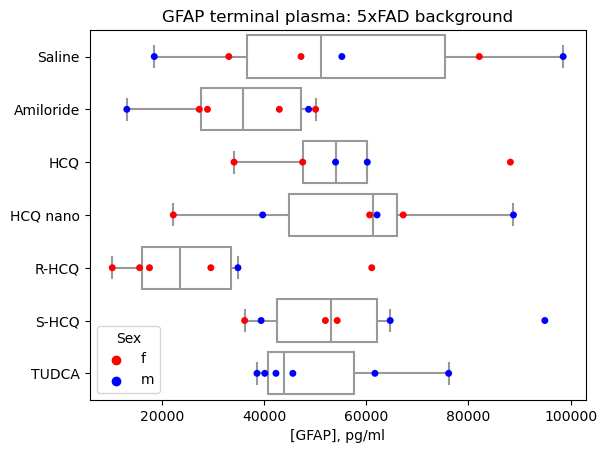

In [23]:
group_list = ['D', 'A', 'B', 'C', 'E', 'F', 'G']
fig, ax = my_boxplot(gfap, group_list=group_list, x='GFAP terminal plasma', biomarker='GFAP')
ax.set_title('GFAP terminal plasma: 5xFAD background')
attila_utils.savefig(fig, 'GFAP-boxplot-treatments-tg')

['named-figure/GFAP-boxplot-treatments-wt.png',
 'named-figure/GFAP-boxplot-treatments-wt.pdf']

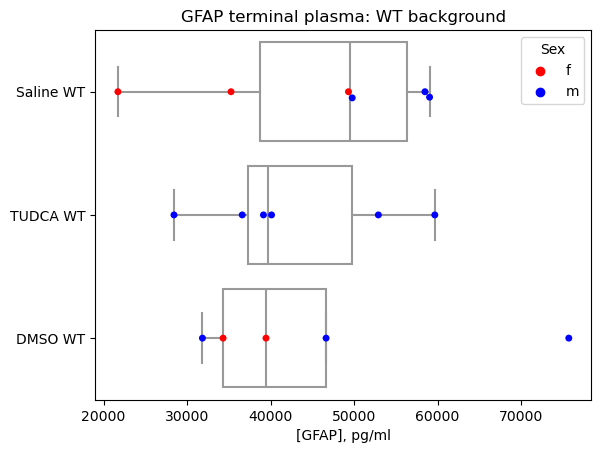

In [24]:
group_list = ['H', 'I', 'J']
fig, ax = my_boxplot(gfap, group_list=group_list, x='GFAP terminal plasma', biomarker='GFAP')
ax.set_title('GFAP terminal plasma: WT background')
attila_utils.savefig(fig, 'GFAP-boxplot-treatments-wt')

In [25]:
%connect_info

{
  "shell_port": 53398,
  "iopub_port": 53399,
  "stdin_port": 53400,
  "control_port": 53402,
  "hb_port": 53401,
  "ip": "127.0.0.1",
  "key": "e8bc796a-b15dd4a0d298007923a83bc0",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": "python3",
  "jupyter_session": "/Users/jonesa7/CTNS/notebooks/2023-11-15-5xfad-nfl-gfap/2023-11-15-5xfad-nfl-gfap.ipynb"
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-87a57ded-0d2f-48ae-85dd-947164a18310.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
